In [ ]:
!pip install -q pyomo
#Below snip of code install the GLPK solver into current python session
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.4 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [ ]:
from pyomo.environ import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

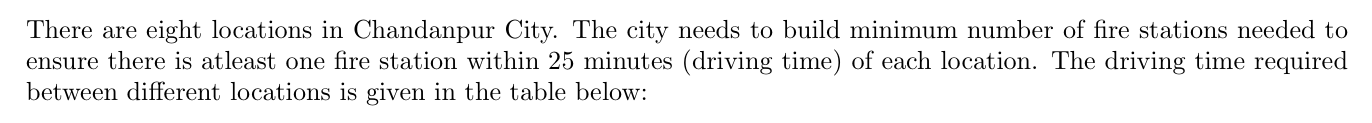

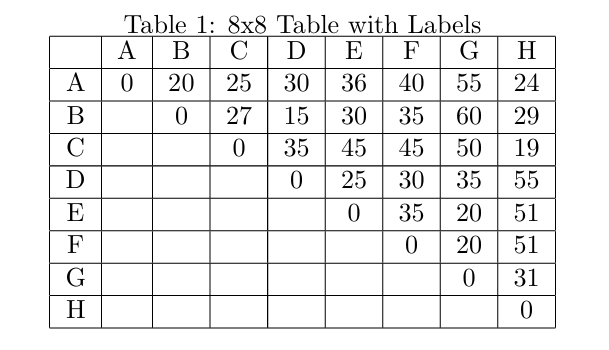

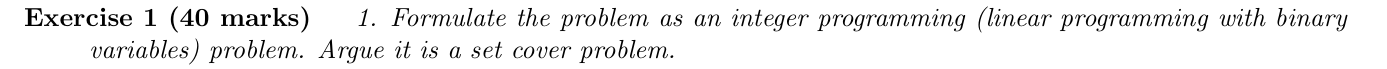

Let us start with defining our variables our cities I represent as numbers in i from 1 to 8,let our variable $y_i$ be:

$y_i \begin{cases}
1 & \text{if $i^{th}$ city is choosen} \\
0 & \text{otherwise}
\end{cases}
$

Since, if we choose the city $i$ then we can cover a city less than 25 kms of distance, hence we define a concept of $\textbf{neighbourhood}$ in this, we say that city $j$ is in neighbourhood of city $i$ if distance between city $j$ and city $i$ is less than 25kms. Hence, neighbourhoods for each city is given below:



First we observe the table:

$$
\begin{array}{cccccccc}
~ & A  & B  & C  & D  & E  & F  & G  & H  \\
A & 0  & 20 & 25 & 30 & 36 & 40 & 55 & 24 \\
B & 20 & 0  & 27 & 15 & 30 & 35 & 60 & 29 \\
C & 25 & 27 & 0  & 35 & 45 & 45 & 50 & 19 \\
D & 30 & 15 & 35 & 0  & 25 & 30 & 35 & 55 \\
E & 36 & 30 & 45 & 25 & 0  & 35 & 20 & 51 \\
F & 40 & 35 & 45 & 30 & 35 & 0  & 20 & 51 \\
G & 55 & 60 & 50 & 35 & 20 & 20 & 0  & 31 \\
H & 24 & 29 & 19 & 55 & 51 & 51 & 31 & 0  
\end{array}
$$

Neighbours for each city:

$A : \{B, C, H\} \\
B : \{A, D\} \\
C : \{A, H\}\\
D : \{B, E\} \\
E : \{D, G\} \\
F : \{G\}\\
G : \{E, F,\} \\
H : \{A, C\}$

In [ ]:
#distance matrix
D =[[0 , 20, 25, 30, 36, 40, 55, 24],
[20, 0 , 27, 15, 30, 35, 60, 29],
[25, 27, 0 , 35, 45, 45, 50, 19],
[30, 15, 35, 0 , 25, 30, 35, 55],
[36, 30, 45, 25, 0 , 35, 20, 51],
[40, 35, 45, 30, 35, 0 , 20, 51],
[55, 60, 50, 35, 20, 20, 0 , 31],
[24, 29, 19, 55, 51, 51, 31, 0]]

In [ ]:
A = [[1,1,1,0,0,0,0,1],
      [1,1,0,1,0,0,0,0],
       [1,0,1,0,0,0,0,1],
        [0,1,0,1,1,0,0,0],
         [0,0,0,1,1,0,1,0],
          [0,0,0,0,0,0,1,1],
           [0,0,0,0,1,1,1,0],
            [1,0,1,0,0,0,0,1]]

Let us represent a varible $a_{ij}$ as:
$a_{ij} \begin{cases} 1 & \text{if i is in neigbourhood of j} \\
0 & \text{otherwise} \end{cases}$

Then our integer program will become:

Objective: $$ \min \sum_{i=1}^{8}y_i $$
Such that : $$ \sum_{j = 1}^{8}a_{ij}y_j \geq 1 \ \ \ ∀ \ i = 1,2,...8$$

The objective is to choose as minimum cities as possible, such that for each city i is covered atleast once. This is ensured as, for each $y_j$ either $i$ itself is choosen or a neighbour of $i$, ( say, $j$ ) is choosen.

This problem is indeed a set cover problem because, when we constraint on $\sum_{j = 1}^{8}a_{ij}y_j$, this takes the node $i$ and constraints that atleast one set is chosen where the node $i$ is present. For ex: for $i =1$

$$
 a_{11}y_1 + a_{12}y_2 + a_{13}y_3 + a_{14}y_4 + a_{15}y_5+ a_{16}y_6 + a_{17}y_7 + a_{18}y_8  \geq 1
$$
$$
 y_1 + y_2 + y_3 + y_8  \geq 1
$$

which shows, that either 1 is selected or its neigbours 2, 3, 8 are chosen, which will cover the node 1.

In [ ]:
model = ConcreteModel()
model.y = Var(range(8), domain = Binary)
model.obj = Objective(expr = sum(model.y[i] for i in range(8)), sense = minimize)

model.constraints = ConstraintList()

for i in range(8):
  model.constraints.add(expr = sum(A[i][j]*model.y[j] for j in range(8)) >= 1)

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)


In [ ]:
model.pprint()

1 Var Declarations
    y : Size=8, Index={0, 1, 2, 3, 4, 5, 6, 7}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   1.0 :     1 : False : False : Binary
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   0.0 :     1 : False : False : Binary
          6 :     0 :   1.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : y[0] + y[1] + y[2] + y[3] + y[4] + y[5] + y[6] + y[7]

1 Constraint Declarations
    constraints : Size=8, Index={1, 2, 3, 4, 5, 6, 7, 8}, Active=True
        Key : Lower : Body                                                           

In [ ]:
result.solver.status

<SolverStatus.ok: 'ok'>

In [ ]:
result.solver.termination_condition

<TerminationCondition.optimal: 'optimal'>

In [ ]:
model.obj()

3.0

In [ ]:
#values of variables
try:
  print('Decision Variables for our model : ')
  for i in range(8):
    print(f'x{i} : ', model.y[i].value)
except:
  print("Problem has  Other than Optimal.")

Decision Variables for our model : 
x0 :  1.0
x1 :  1.0
x2 :  0.0
x3 :  0.0
x4 :  0.0
x5 :  0.0
x6 :  1.0
x7 :  0.0


According to this, we have to choose city A, B, and G as the facility to open fire stations, these city will also cover the whole set as:

$A : \{B, C, H\} \\
B : \{A, D\} \\
G : \{E, F,\}
$



This will cover A, B,C, D, E, F, G, H

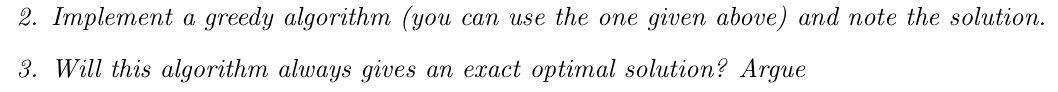

In [ ]:
#first we create subsets to take, we take the sets as for each city we choose their negbourbors as sets

S = [[] for i in range(8)]
for i in range(8):
  for j in range(8):
    if D[i][j] <= 25:  #D is distance matrix defined above
      S[i].append(j+1)
temp = []
for ls in S:
  s = set(ls)
  temp.append(s)
S= temp
S

[{1, 2, 3, 8},
 {1, 2, 4},
 {1, 3, 8},
 {2, 4, 5},
 {4, 5, 7},
 {6, 7},
 {5, 6, 7},
 {1, 3, 8}]

In [ ]:
U = set([1,2,3,4,5,6,7,8])
U

{1, 2, 3, 4, 5, 6, 7, 8}

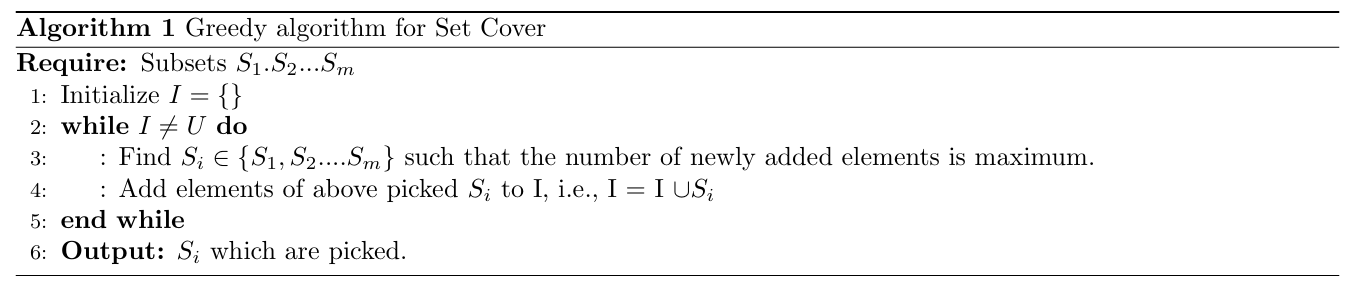

In [ ]:

def greedy(S, U):
  I = set()
  index_store = []
  j = 0
  while I != U:
    # to find the max intersection element set
    max_element_set = 0
    max_length = 0
    for i in range(len(S)):
      # Si - I intersection Si
      if len(S[i].difference(I.intersection(S[i]))) > max_length:
        max_element_set = i
        max_length = len(S[i].difference(I.intersection(S[i])))
    #to add those elements in the set
    index_store.append(max_element_set+1)
    for element in S[max_element_set]:
      I.add(element)
    print("I after this step: ", I)
  return index_store

In [ ]:
print("Set number to be choosen: ", greedy(S, U))

I after this step:  {8, 1, 2, 3}
I after this step:  {1, 2, 3, 4, 5, 7, 8}
I after this step:  {1, 2, 3, 4, 5, 6, 7, 8}
Set number to be choosen:  [1, 5, 6]


Sets to be choosen are this:

$A : \{B, C, H\} \\
E : \{D, G\} \\
F : \{G\}
$

The cities to be select from this (taken according to distance matrix) are:

$\text{A, E, F}$

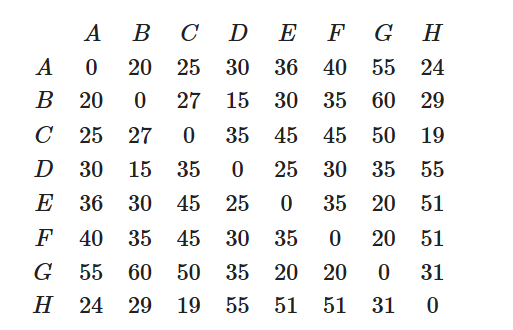

No, a greedy algorithm for the set cover problem does not always provide an optimal solution.

A greedy algorithm for the set cover problem works by iteratively selecting the set that covers the largest number of uncovered elements until all elements are covered. While this approach can yield a reasonably good solution and is efficient in terms of time complexity, it doesn't guarantee an optimal solution in all cases.

In some instances, the greedy algorithm may produce a solution that is close to optimal, but there are cases where it may select sets inefficiently, leading to a suboptimal solution. To ensure optimality, one would typically need to explore all possible combinations of sets, which can be computationally prohibitive for large instances of the problem. Thus, for practical purposes, the greedy algorithm is often used as an approximation algorithm to find a near-optimal solution quickly, rather than guaranteeing optimality.

For ex:

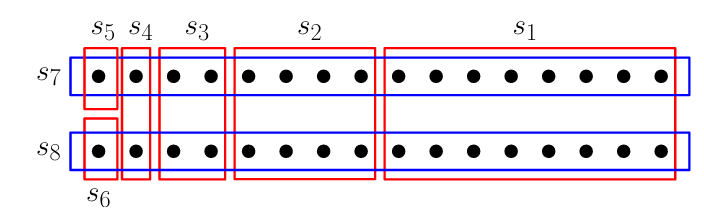

In this example, though the optimal is s7 and s8, we continously choose the wrong sets and our solution is not optimal

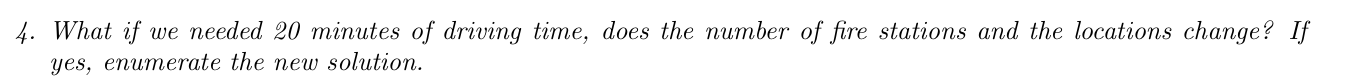

Using this, our sets of neighbours changes we have something like:

In [ ]:
#first we create subsets to take, we take the sets as for each city we choose their negbourbors as sets

S = [[] for i in range(8)]
for i in range(8):
  for j in range(8):
    if D[i][j] <= 20:  #D is distance matrix defined above
      S[i].append(j+1)
temp = []
for ls in S:
  s = set(ls)
  temp.append(s)
S= temp
S

[{1, 2}, {1, 2, 4}, {3, 8}, {2, 4}, {5, 7}, {6, 7}, {5, 6, 7}, {3, 8}]

These are our sets

In [ ]:
#applying greedy will give us
print("Set number to be choosen: ", greedy(S, U))

I after this step:  {1, 2, 4}
I after this step:  {1, 2, 4, 5, 6, 7}
I after this step:  {1, 2, 3, 4, 5, 6, 7, 8}
Set number to be choosen:  [2, 7, 3]


It gives us set 2, 7 and 3 meaning, $\text{{1, 2, 4}, {3, 8}, {5, 6, 7}}$

which is $\text{ {A, B, D}, {C, H}, {E, F, G} }$

And the cities to take is $\text{B, C, G}$

The number of cities to take do not change, but the location of fire stations change

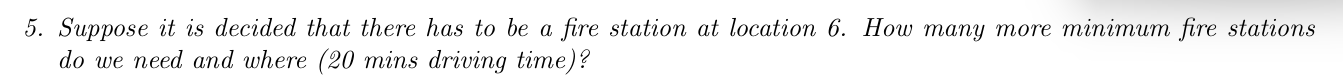

if G needs to be choosen then, we predefine our I set to G and its neigbours before running the greedy algorithm

In [ ]:
#first we create subsets to take, we take the sets as for each city we choose their negbourbors as sets

S = [[] for i in range(8)]
for i in range(8):
  for j in range(8):
    if D[i][j] <= 20:  #D is distance matrix defined above
      S[i].append(j+1)
temp = []
for ls in S:
  s = set(ls)
  temp.append(s)
S= temp
S

[{1, 2}, {1, 2, 4}, {3, 8}, {2, 4}, {5, 7}, {6, 7}, {5, 6, 7}, {3, 8}]

In [ ]:
# if F needs to be choosen then, we predefine our I set to G and its neigbours before running the greedy algorithm,
#the new algorithm will become:

def greedy(S, U):
  I = set([5, 6, 7])
  index_store = [7]
  j = 0
  while I != U:
    # to find the max intersection element set
    max_element_set = 0
    max_length = 0
    for i in range(len(S)):
      # Si - I intersection Si
      if len(S[i].difference(I.intersection(S[i]))) > max_length:
        max_element_set = i
        max_length = len(S[i].difference(I.intersection(S[i])))
    #to add those elements in the set
    index_store.append(max_element_set+1)
    for element in S[max_element_set]:
      I.add(element)
    print("I after this step: ", I)
  return index_store

In [ ]:
#applying greedy will give us
print("Set number to be choosen: ", greedy(S, U))

I after this step:  {1, 2, 4, 5, 6, 7}
I after this step:  {1, 2, 3, 4, 5, 6, 7, 8}
Set number to be choosen:  [7, 2, 3]


Seeing this, we need still need same number fire station then previous number. The locations are $\text{B, C, G}$

and sets are $\text{ {5, 6, 7}, {1, 2, 4}, {3, 8} }$